In [2]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [4]:
import yfinance as yf
df_MSFT = yf.download(tickers='MSFT')
df_MSFT

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price            Close        High         Low        Open      Volume
Ticker            MSFT        MSFT        MSFT        MSFT        MSFT
Date                                                                  
1986-03-13    0.059598    0.062259    0.054277    0.054277  1031788800
1986-03-14    0.061726    0.062791    0.059598    0.059598   308160000
1986-03-17    0.062791    0.063323    0.061726    0.061726   133171200
1986-03-18    0.061194    0.063323    0.060662    0.062791    67766400
1986-03-19    0.060130    0.061726    0.059598    0.061194    47894400
...                ...         ...         ...         ...         ...
2025-06-02  461.970001  462.109985  456.890015  457.140015    16626500
2025-06-03  462.970001  464.140015  460.859985  461.470001    15743800
2025-06-04  463.869995  465.690002  463.019989  464.000000    14162700
2025-06-05  467.679993  469.649994  464.029999  464.959991    20154500
2025-06-06  470.380005  473.339996  468.779999  470.089996    15278600

[9886 rows x 5 columns]

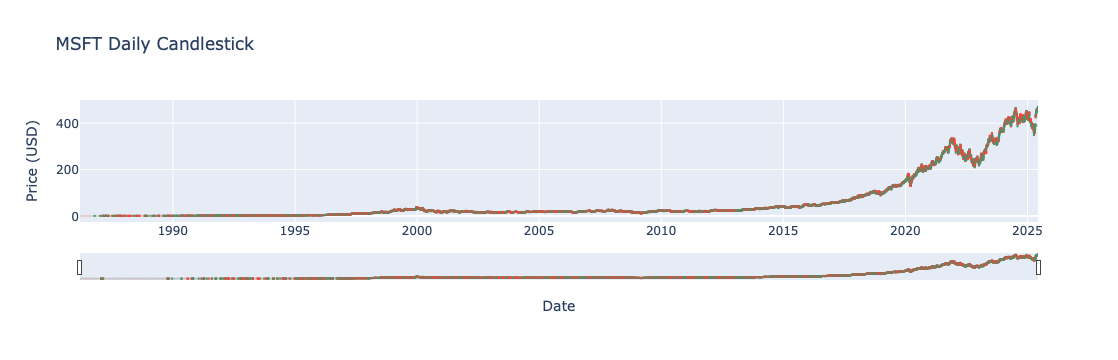

In [6]:
import plotly.graph_objects as go

df = df_MSFT   # <— still has MultiIndex columns

fig = go.Figure()
fig.add_candlestick(
    x=df.index,
    open=df[('Open',  'MSFT')],   # pick the (“Open","MSFT”) column
    high=df[('High',  'MSFT')],
    low=df[('Low',    'MSFT')],
    close=df[('Close', 'MSFT')],
    name="MSFT"
)

fig.update_layout(
    title="MSFT Daily Candlestick",
    xaxis_title="Date",
    yaxis_title="Price (USD)"
)
fig.show()

In [8]:
df_MSFT.to_excel("Microsoft_Stock_Price_Historical_Daily.xlsx")
df_MSFT.to_csv("Microsoft_Stock_Price_Historical_Daily.csv")

In [10]:
import pandas as pd
# 1) Grab both header rows so you reconstruct your MultiIndex
df_microsoft = pd.read_excel(
    "Microsoft_Stock_Price_Historical_Daily.xlsx",
    header=[0,1],    # two rows → MultiIndex columns
    index_col=0      # first column (dates) becomes the index
)

# 2) Turn that index (which is currently strings) into real Timestamps
df_microsoft.index = pd.to_datetime(df_microsoft.index)

# (optional) if you don’t actually want a MultiIndex on the columns,
# drop the ticker‐level:
df_microsoft.columns = df_microsoft.columns.droplevel(1)

df_microsoft.head()

Price          Close      High       Low      Open      Volume
Date                                                          
1986-03-13  0.059598  0.062259  0.054277  0.054277  1031788800
1986-03-14  0.061726  0.062791  0.059598  0.059598   308160000
1986-03-17  0.062791  0.063323  0.061726  0.061726   133171200
1986-03-18  0.061194  0.063323  0.060662  0.062791    67766400
1986-03-19  0.060130  0.061726  0.059598  0.061194    47894400

In [12]:
df_microsoft_linkedin = df_microsoft.loc['2016-12-08':,:].copy()
df_microsoft_linkedin['change_tomorrow'] = df_microsoft_linkedin.Close.pct_change(-1) * 100 * -1
df_microsoft_linkedin

Price            Close        High         Low        Open    Volume  \
Date                                                                   
2016-12-08   55.080009   55.594610   54.926535   55.341823  21220800   
2016-12-09   55.946701   55.964758   55.188346   55.233486  27349400   
2016-12-12   56.127266   56.244631   55.721007   55.811286  20198100   
2016-12-13   56.858540   57.255772   56.190467   56.425195  35718900   
2016-12-14   56.587696   57.282855   56.452274   56.876593  30352700   
...                ...         ...         ...         ...       ...   
2025-06-02  461.970001  462.109985  456.890015  457.140015  16626500   
2025-06-03  462.970001  464.140015  460.859985  461.470001  15743800   
2025-06-04  463.869995  465.690002  463.019989  464.000000  14162700   
2025-06-05  467.679993  469.649994  464.029999  464.959991  20154500   
2025-06-06  470.380005  473.339996  468.779999  470.089996  15278600   

Price       change_tomorrow  
Date                         
2016-12-08         1.549138  
2016-12-09         0.321706  
2016-12-12         1.286128  
2016-12-13        -0.478626  
2016-12-14        -0.159806  
...                     ...  
2025-06-02         0.215997  
2025-06-03         0.194019  
2025-06-04         0.814659  
2025-06-05         0.574007  
2025-06-06              NaN  

[2135 rows x 6 columns]

In [14]:
df_microsoft_linkedin = df_microsoft_linkedin.dropna().copy()

# Did the stock go up or down?
import numpy as np

df_microsoft_linkedin['change_tomorrow_direction'] = np.where(
    df_microsoft_linkedin.change_tomorrow > 0, 'UP', 'DOWN')
df_microsoft_linkedin.change_tomorrow_direction.value_counts()

change_tomorrow_direction
UP      1155
DOWN     979
Name: count, dtype: int64

<Axes: xlabel='Date'>

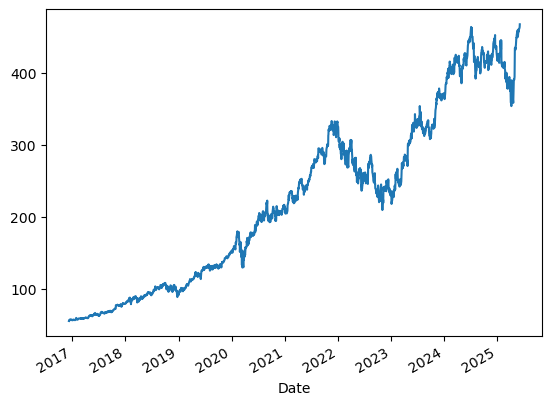

In [16]:
df_microsoft_linkedin.Close.plot()

In [18]:
df_microsoft_linkedin.to_excel('Microsoft_LinkedIn_Processed.xlsx')

In [20]:
# Machine Learning Classification Model
df = pd.read_excel('Microsoft_LinkedIn_Processed.xlsx', parse_dates=['Date'], index_col=0)
df

Close        High         Low        Open    Volume  \
Date                                                                   
2016-12-08   55.080009   55.594610   54.926535   55.341823  21220800   
2016-12-09   55.946701   55.964758   55.188346   55.233486  27349400   
2016-12-12   56.127266   56.244631   55.721007   55.811286  20198100   
2016-12-13   56.858540   57.255772   56.190467   56.425195  35718900   
2016-12-14   56.587696   57.282855   56.452274   56.876593  30352700   
...                ...         ...         ...         ...       ...   
2025-05-30  460.359985  461.679993  455.540009  459.720001  34770500   
2025-06-02  461.970001  462.109985  456.890015  457.140015  16626500   
2025-06-03  462.970001  464.140015  460.859985  461.470001  15743800   
2025-06-04  463.869995  465.690002  463.019989  464.000000  14162700   
2025-06-05  467.679993  469.649994  464.029999  464.959991  20154500   

            change_tomorrow change_tomorrow_direction  
Date                                                   
2016-12-08         1.549138                        UP  
2016-12-09         0.321706                        UP  
2016-12-12         1.286128                        UP  
2016-12-13        -0.478626                      DOWN  
2016-12-14        -0.159806                      DOWN  
...                     ...                       ...  
2025-05-30         0.348511                        UP  
2025-06-02         0.215997                        UP  
2025-06-03         0.194019                        UP  
2025-06-04         0.814659                        UP  
2025-06-05         0.574007                        UP  

[2134 rows x 7 columns]

In [22]:
target = df.change_tomorrow_direction

# Explanatory: which variables will you use to calculate the prediction?
explanatory = df.drop(columns=['change_tomorrow','change_tomorrow_direction'])

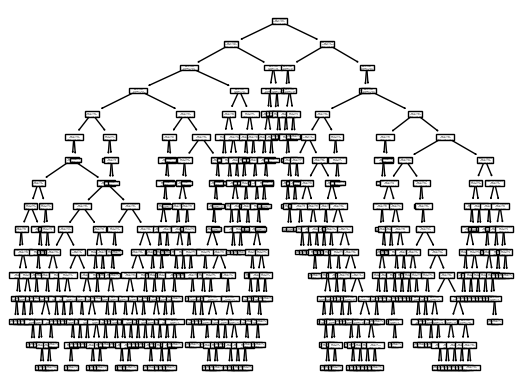

In [24]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(max_depth=15)
model_dt.fit(X=explanatory, y=target)

# Visualize the model:
from sklearn.tree import plot_tree
plot_tree(decision_tree=model_dt, feature_names=model_dt.feature_names_in_);

In [26]:
# Predict
y_pred = model_dt.predict(X=explanatory)

# Compare actual vs predicted
df_predictions = df[['change_tomorrow_direction']].copy()
df_predictions['prediction'] = y_pred

df_predictions.head()

change_tomorrow_direction prediction
Date                                           
2016-12-08                        UP         UP
2016-12-09                        UP         UP
2016-12-12                        UP         UP
2016-12-13                      DOWN       DOWN
2016-12-14                      DOWN       DOWN

In [28]:
comp = df_predictions.change_tomorrow_direction == df_predictions.prediction
comp.sum() / len(comp)

0.7853795688847235

In [30]:
model_dt.score(X=explanatory, y=target)

0.7853795688847235

In [32]:
import os
os.makedirs('models')

In [34]:
import pickle
with open('models/model_dt_classification.pkl', 'wb') as f:
    pickle.dump(model_dt, f)

In [36]:
# Backtesting ML Classification-Based
df = pd.read_excel('Microsoft_LinkedIn_Processed.xlsx', parse_dates=['Date'], index_col=0)
df

Close        High         Low        Open    Volume  \
Date                                                                   
2016-12-08   55.080009   55.594610   54.926535   55.341823  21220800   
2016-12-09   55.946701   55.964758   55.188346   55.233486  27349400   
2016-12-12   56.127266   56.244631   55.721007   55.811286  20198100   
2016-12-13   56.858540   57.255772   56.190467   56.425195  35718900   
2016-12-14   56.587696   57.282855   56.452274   56.876593  30352700   
...                ...         ...         ...         ...       ...   
2025-05-30  460.359985  461.679993  455.540009  459.720001  34770500   
2025-06-02  461.970001  462.109985  456.890015  457.140015  16626500   
2025-06-03  462.970001  464.140015  460.859985  461.470001  15743800   
2025-06-04  463.869995  465.690002  463.019989  464.000000  14162700   
2025-06-05  467.679993  469.649994  464.029999  464.959991  20154500   

            change_tomorrow change_tomorrow_direction  
Date                                                   
2016-12-08         1.549138                        UP  
2016-12-09         0.321706                        UP  
2016-12-12         1.286128                        UP  
2016-12-13        -0.478626                      DOWN  
2016-12-14        -0.159806                      DOWN  
...                     ...                       ...  
2025-05-30         0.348511                        UP  
2025-06-02         0.215997                        UP  
2025-06-03         0.194019                        UP  
2025-06-04         0.814659                        UP  
2025-06-05         0.574007                        UP  

[2134 rows x 7 columns]

In [38]:
pip install backtesting

Note: you may need to restart the kernel to use updated packages.


In [40]:
from backtesting import Backtest, Strategy

df_explanatory = df.drop(columns=['change_tomorrow', 'change_tomorrow_direction'])
model_dt.predict(X=df_explanatory)

/opt/anaconda3/lib/python3.12/site-packages/backtesting/_plotting.py:55: UserWarning:

Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support, such as old IDEs. Reset with `backtesting.set_bokeh_output(notebook=False)`.



Loading BokehJS ...

array(['UP', 'UP', 'UP', ..., 'UP', 'UP', 'UP'], dtype=object)

In [42]:
explanatory_today = df_explanatory.iloc[-1:]
forecast_tomorrow = model_dt.predict(explanatory_today)[0]

In [44]:
# Calculate Purchase Recommendation 
list_buy_sell = []

for tomorrow_direction in df.change_tomorrow_direction:
    if tomorrow_direction == 'UP':
        list_buy_sell.append(1)
    elif tomorrow_direction == 'DOWN':
        list_buy_sell.append(-1)

df['buy_sell'] = list_buy_sell
df[['change_tomorrow_direction','buy_sell']].head(10)

change_tomorrow_direction  buy_sell
Date                                          
2016-12-08                        UP         1
2016-12-09                        UP         1
2016-12-12                        UP         1
2016-12-13                      DOWN        -1
2016-12-14                      DOWN        -1
2016-12-15                      DOWN        -1
2016-12-16                        UP         1
2016-12-19                      DOWN        -1
2016-12-20                      DOWN        -1
2016-12-21                        UP         1

In [46]:
# Buy if it goes and sell if down (You can only sell if you have already bought)
list_buy_sell = []
already_bought = False

for tomorrow_direction in df.change_tomorrow_direction:
    if tomorrow_direction == 'UP' and not already_bought:
        list_buy_sell.append(1)
        already_bought = True
    elif tomorrow_direction == 'DOWN' and already_bought:
        list_buy_sell.append(-1)
        already_bought = False
    else:
        list_buy_sell.append(0)

df['buy_sell_track'] = list_buy_sell

df[['change_tomorrow_direction', 'buy_sell', 'buy_sell_track']].head(10)

change_tomorrow_direction  buy_sell  buy_sell_track
Date                                                          
2016-12-08                        UP         1               1
2016-12-09                        UP         1               0
2016-12-12                        UP         1               0
2016-12-13                      DOWN        -1              -1
2016-12-14                      DOWN        -1               0
2016-12-15                      DOWN        -1               0
2016-12-16                        UP         1               1
2016-12-19                      DOWN        -1              -1
2016-12-20                      DOWN        -1               0
2016-12-21                        UP         1               1

In [48]:
class ClassificationUP(Strategy):
    def init(self):
        self.model = model_dt
        self.already_bought = False

    def next(self):
        explanatory_today = df_explanatory.iloc[[-1], :]  # keep shape as DataFrame
        forecast_tomorrow = self.model.predict(explanatory_today)[0]

        if forecast_tomorrow == 'UP' and not self.already_bought:
            self.buy()
            self.already_bought = True
        elif forecast_tomorrow == 'DOWN' and self.already_bought:
            self.sell()
            self.already_bought = False
        else:
            pass

In [55]:
bt = Backtest(
    df_explanatory,
    ClassificationUP,  # your strategy class name
    cash=10000,
    commission=0.002,
    exclusive_orders=True
)

results = bt.run()

# Display strategy return
results.to_frame(name='Values').loc[:'Return [%]']

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Values
Start              2016-12-08 00:00:00
End                2025-06-05 00:00:00
Duration            3101 days 00:00:00
Exposure Time [%]                  0.0
Equity Final [$]           83292.76093
Equity Peak [$]            83292.76093
Return [%]                  732.927609

In [57]:
bt.plot(filename='classification.html')

/opt/anaconda3/lib/python3.12/site-packages/backtesting/_plotting.py:701: UserWarning:

found multiple competing values for 'toolbar.active_drag' property; using the latest value

/opt/anaconda3/lib/python3.12/site-packages/backtesting/_plotting.py:701: UserWarning:

found multiple competing values for 'toolbar.active_scroll' property; using the latest value



GridPlot(id='p1321', ...)

/opt/anaconda3/lib/python3.12/site-packages/backtesting/_plotting.py:701: UserWarning:

found multiple competing values for 'toolbar.active_drag' property; using the latest value

/opt/anaconda3/lib/python3.12/site-packages/backtesting/_plotting.py:701: UserWarning:

found multiple competing values for 'toolbar.active_scroll' property; using the latest value



GridPlot(id='p1491', ...)

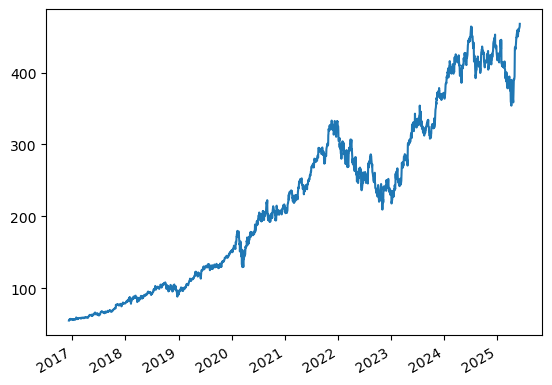

In [59]:
# Path: file:///Users/andy-phucnguyen/classification.html
df.Close.plot();
bt.plot()

In [61]:
# Backtesting ML Regression-Based
df = pd.read_excel('Microsoft_LinkedIn_Processed.xlsx', parse_dates=['Date'], index_col=0)
df

Close        High         Low        Open    Volume  \
Date                                                                   
2016-12-08   55.080009   55.594610   54.926535   55.341823  21220800   
2016-12-09   55.946701   55.964758   55.188346   55.233486  27349400   
2016-12-12   56.127266   56.244631   55.721007   55.811286  20198100   
2016-12-13   56.858540   57.255772   56.190467   56.425195  35718900   
2016-12-14   56.587696   57.282855   56.452274   56.876593  30352700   
...                ...         ...         ...         ...       ...   
2025-05-30  460.359985  461.679993  455.540009  459.720001  34770500   
2025-06-02  461.970001  462.109985  456.890015  457.140015  16626500   
2025-06-03  462.970001  464.140015  460.859985  461.470001  15743800   
2025-06-04  463.869995  465.690002  463.019989  464.000000  14162700   
2025-06-05  467.679993  469.649994  464.029999  464.959991  20154500   

            change_tomorrow change_tomorrow_direction  
Date                                                   
2016-12-08         1.549138                        UP  
2016-12-09         0.321706                        UP  
2016-12-12         1.286128                        UP  
2016-12-13        -0.478626                      DOWN  
2016-12-14        -0.159806                      DOWN  
...                     ...                       ...  
2025-05-30         0.348511                        UP  
2025-06-02         0.215997                        UP  
2025-06-03         0.194019                        UP  
2025-06-04         0.814659                        UP  
2025-06-05         0.574007                        UP  

[2134 rows x 7 columns]

In [63]:
target = df.change_tomorrow
explanatory = df[['Open','High','Low','Close','Volume']]

from sklearn.tree import DecisionTreeRegressor

# Initialize and train the regression model
model_dt = DecisionTreeRegressor(max_depth=15)
model_dt.fit(X=explanatory, y=target)

DecisionTreeRegressor(max_depth=15)

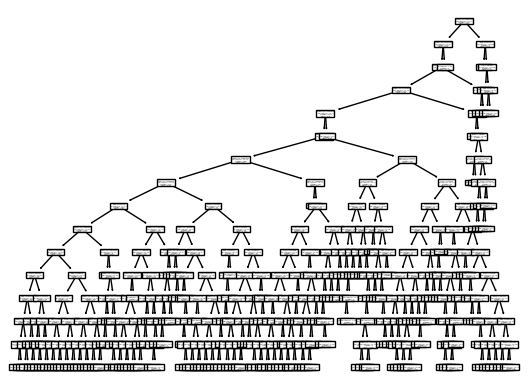

In [65]:
from sklearn.tree import plot_tree
plot_tree(decision_tree=model_dt, feature_names=model_dt.feature_names_in_);

In [67]:
# Predict numerical outcome
y_pred = model_dt.predict(X=explanatory)

# Store actual vs predicted in a DataFrame
df_predictions = df[['change_tomorrow']].copy()
df_predictions['prediction'] = y_pred

# View the prediction comparison
df_predictions

change_tomorrow  prediction
Date                                   
2016-12-08         1.549138    0.120741
2016-12-09         0.321706    0.562617
2016-12-12         1.286128    0.120741
2016-12-13        -0.478626   -0.199914
2016-12-14        -0.159806    0.147997
...                     ...         ...
2025-05-30         0.348511    0.348511
2025-06-02         0.215997   -0.238806
2025-06-03         0.194019   -0.238806
2025-06-04         0.814659   -0.238806
2025-06-05         0.574007   -0.238806

[2134 rows x 2 columns]

In [69]:
model_dt.score(X=explanatory, y=target)

0.4297271157546221

In [71]:
# Evaluate Regression Models
import numpy as np

# Calculate prediction error
df_predictions['error'] = df_predictions['prediction'] - df_predictions['change_tomorrow']

# Square the errors
df_predictions['error2'] = df_predictions['error'] ** 2

# Sum of Squared Errors (SSE)
sse = df_predictions['error2'].sum()

# Mean Squared Error (MSE)
mse = df_predictions['error2'].mean()

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print("SSE:", round(sse, 2))
print("MSE:", round(mse, 4))
print("RMSE:", round(rmse, 4))

SSE: 3694.67
MSE: 1.7313
RMSE: 1.3158


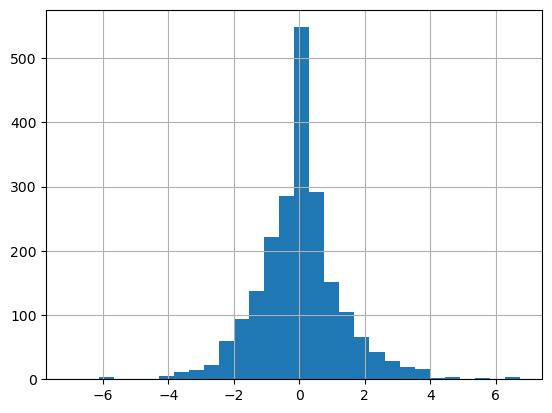

In [73]:
df_predictions.error.hist(bins=30);

In [75]:
import pickle
# Save the model to a file
with open('models/model_dt_regression.pkl', 'wb') as f:
    pickle.dump(model_dt, f)

In [77]:
class Regression(Strategy):
    def init(self):
        self.model = model_dt
        self.already_bought = False
        self.feature_names = model_dt.feature_names_in_

    def next(self):
        explanatory_today = self.data.df.iloc[[-1], :]
        explanatory_today = explanatory_today[self.feature_names]  # reorder to match

        forecast_tomorrow = self.model.predict(explanatory_today)[0]

        if forecast_tomorrow > 5 and not self.already_bought:
            self.buy()
            self.already_bought = True
        elif forecast_tomorrow <= 5 and self.already_bought:
            self.sell()
            self.already_bought = False

In [79]:
# Prepare data (drop unused columns)
df_explanatory = df.drop(columns=['change_tomorrow', 'change_tomorrow_direction'])

# Run backtest
bt1 = Backtest(
    df_explanatory,
    Regression,  # your regression-based Strategy class
    cash=10000,
    commission=0.002,
    exclusive_orders=True
)

results = bt1.run()

# Show return percentage
results.to_frame(name='Values').loc[:'Return [%]']

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Values
Start              2016-12-08 00:00:00
End                2025-06-05 00:00:00
Duration            3101 days 00:00:00
Exposure Time [%]            76.757263
Equity Final [$]           1487.287223
Equity Peak [$]           10892.654951
Commissions [$]             412.644633
Return [%]                  -85.127128

In [81]:
bt1.plot(filename='regression.html')

/opt/anaconda3/lib/python3.12/site-packages/backtesting/_plotting.py:701: UserWarning:

found multiple competing values for 'toolbar.active_drag' property; using the latest value

/opt/anaconda3/lib/python3.12/site-packages/backtesting/_plotting.py:701: UserWarning:

found multiple competing values for 'toolbar.active_scroll' property; using the latest value



GridPlot(id='p1825', ...)

In [86]:
# Address: file:///Users/andy-phucnguyen/regression.html

In [102]:
# Optimizing Strategy Parameters
import pickle

with open('models/model_dt_regression.pkl', 'rb') as f:
    model_dt = pickle.load(f)

model_dt

DecisionTreeRegressor(max_depth=15)

In [104]:
import pandas as pd

df = pd.read_excel('Microsoft_LinkedIn_Processed.xlsx', index_col=0, parse_dates=['Date'])
df

Close        High         Low        Open    Volume  \
Date                                                                   
2016-12-08   55.080009   55.594610   54.926535   55.341823  21220800   
2016-12-09   55.946701   55.964758   55.188346   55.233486  27349400   
2016-12-12   56.127266   56.244631   55.721007   55.811286  20198100   
2016-12-13   56.858540   57.255772   56.190467   56.425195  35718900   
2016-12-14   56.587696   57.282855   56.452274   56.876593  30352700   
...                ...         ...         ...         ...       ...   
2025-05-30  460.359985  461.679993  455.540009  459.720001  34770500   
2025-06-02  461.970001  462.109985  456.890015  457.140015  16626500   
2025-06-03  462.970001  464.140015  460.859985  461.470001  15743800   
2025-06-04  463.869995  465.690002  463.019989  464.000000  14162700   
2025-06-05  467.679993  469.649994  464.029999  464.959991  20154500   

            change_tomorrow change_tomorrow_direction  
Date                                                   
2016-12-08         1.549138                        UP  
2016-12-09         0.321706                        UP  
2016-12-12         1.286128                        UP  
2016-12-13        -0.478626                      DOWN  
2016-12-14        -0.159806                      DOWN  
...                     ...                       ...  
2025-05-30         0.348511                        UP  
2025-06-02         0.215997                        UP  
2025-06-03         0.194019                        UP  
2025-06-04         0.814659                        UP  
2025-06-05         0.574007                        UP  

[2134 rows x 7 columns]

In [106]:
from backtesting import Strategy, Backtest
class Regression(Strategy):
    def init(self):
        self.model = model_dt
        self.already_bought = False

    def next(self):
        explanatory_today = self.data.df.iloc[[-1], :]
        forecast_tomorrow = self.model.predict(explanatory_today)[0]
        
        if forecast_tomorrow > 1 and self.already_bought == False:
            self.buy()
            self.already_bought = True
        elif forecast_tomorrow < -5 and self.already_bought == True:
            self.sell()
            self.already_bought = False
        else:
            pass

In [108]:
df_explanatory = df[['Open', 'High', 'Low', 'Close', 'Volume']].copy()
bt2 = Backtest(df_explanatory, Regression,
              cash=10000, commission=.002, exclusive_orders=True)

In [110]:
model_dt.predict(df_explanatory)

array([ 0.12074131,  0.56261668,  0.12074131, ..., -0.23880632,
       -0.23880632, -0.23880632])

In [114]:
results = bt2.run()
results.to_frame(name='Values').loc[:'Return [%]']

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Values
Start              2016-12-08 00:00:00
End                2025-06-05 00:00:00
Duration            3101 days 00:00:00
Exposure Time [%]            97.563261
Equity Final [$]         116621.806945
Equity Peak [$]          116621.806945
Commissions [$]            3112.753852
Return [%]                 1066.218069

In [116]:
# Create Strategy clsss:
class Regression(Strategy):
    
    limit_buy = 1
    limit_sell = -5
    
    def init(self):
        self.model = model_dt
        self.already_bought = False

    def next(self):
        explanatory_today = self.data.df.iloc[[-1], :]
        forecast_tomorrow = self.model.predict(explanatory_today)[0]
        
        if forecast_tomorrow > self.limit_buy and self.already_bought == False:
            self.buy()
            self.already_bought = True
        elif forecast_tomorrow < self.limit_sell and self.already_bought == True:
            self.sell()
            self.already_bought = False
        else:
            pass

In [118]:
bt3 = Backtest(df_explanatory, Regression,
              cash=10000, commission=.002, exclusive_orders=True)

In [120]:
list_limits_buy = list(range(0, 11, 1))
list_limits_buy

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [122]:
list_limits_sell = list(range(0, -11, -1))
list_limits_sell

[0, -1, -2, -3, -4, -5, -6, -7, -8, -9, -10]

In [124]:
%%time

results = bt3.optimize(
    limit_buy = list_limits_buy, limit_sell = list_limits_sell,
    maximize='Return [%]', return_heatmap=True
)

/opt/anaconda3/lib/python3.12/site-packages/backtesting/backtesting.py:1606: RuntimeWarning:

If you want to use multi-process optimization with `multiprocessing.get_start_method() == 'spawn'` (e.g. on Windows),set `backtesting.Pool = multiprocessing.Pool` (or of the desired context) and hide `bt.optimize()` call behind a `if __name__ == '__main__'` guard. Currently using thread-based paralellism, which might be slightly slower for non-numpy / non-GIL-releasing code. See https://github.com/kernc/backtesting.py/issues/1256



Backtest.optimize:   0%|          | 0/121 [00:00<?, ?it/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

/opt/anaconda3/lib/python3.12/site-packages/backtesting/_stats.py:155: RuntimeWarning:

divide by zero encountered in log

/opt/anaconda3/lib/python3.12/site-packages/backtesting/_stats.py:155: RuntimeWarning:

divide by zero encountered in log

/opt/anaconda3/lib/python3.12/site-packages/backtesting/_stats.py:155: RuntimeWarning:

divide by zero encountered in log



Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

/opt/anaconda3/lib/python3.12/site-packages/backtesting/_stats.py:155: RuntimeWarning:

divide by zero encountered in log



Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

/opt/anaconda3/lib/python3.12/site-packages/backtesting/_stats.py:155: RuntimeWarning:

divide by zero encountered in log



Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

/opt/anaconda3/lib/python3.12/site-packages/backtesting/_stats.py:155: RuntimeWarning:

divide by zero encountered in log



Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

/opt/anaconda3/lib/python3.12/site-packages/backtesting/_stats.py:155: RuntimeWarning:

divide by zero encountered in log



Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

/opt/anaconda3/lib/python3.12/site-packages/backtesting/_stats.py:155: RuntimeWarning:

divide by zero encountered in log

/opt/anaconda3/lib/python3.12/site-packages/backtesting/_stats.py:155: RuntimeWarning:

divide by zero encountered in log



Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

/opt/anaconda3/lib/python3.12/site-packages/backtesting/_stats.py:155: RuntimeWarning:

divide by zero encountered in log

/opt/anaconda3/lib/python3.12/site-packages/backtesting/_stats.py:155: RuntimeWarning:

divide by zero encountered in log

/opt/anaconda3/lib/python3.12/site-packages/backtesting/_stats.py:155: RuntimeWarning:

divide by zero encountered in log



Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

/opt/anaconda3/lib/python3.12/site-packages/backtesting/_stats.py:155: RuntimeWarning:

divide by zero encountered in log



Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

/opt/anaconda3/lib/python3.12/site-packages/backtesting/_stats.py:155: RuntimeWarning:

divide by zero encountered in log

/opt/anaconda3/lib/python3.12/site-packages/backtesting/_stats.py:155: RuntimeWarning:

divide by zero encountered in log



Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

/opt/anaconda3/lib/python3.12/site-packages/backtesting/_stats.py:155: RuntimeWarning:

divide by zero encountered in log



Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

/opt/anaconda3/lib/python3.12/site-packages/backtesting/_stats.py:155: RuntimeWarning:

divide by zero encountered in log



Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

/opt/anaconda3/lib/python3.12/site-packages/backtesting/_stats.py:155: RuntimeWarning:

divide by zero encountered in log

/opt/anaconda3/lib/python3.12/site-packages/backtesting/_stats.py:155: RuntimeWarning:

divide by zero encountered in log



Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

/opt/anaconda3/lib/python3.12/site-packages/backtesting/_stats.py:155: RuntimeWarning:

divide by zero encountered in log



Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

/opt/anaconda3/lib/python3.12/site-packages/backtesting/_stats.py:155: RuntimeWarning:

divide by zero encountered in log



Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

/opt/anaconda3/lib/python3.12/site-packages/backtesting/_stats.py:155: RuntimeWarning:

divide by zero encountered in log

/opt/anaconda3/lib/python3.12/site-packages/backtesting/_stats.py:155: RuntimeWarning:

divide by zero encountered in log

/opt/anaconda3/lib/python3.12/site-packages/backtesting/_stats.py:155: RuntimeWarning:

divide by zero encountered in log



Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

/opt/anaconda3/lib/python3.12/site-packages/backtesting/_stats.py:155: RuntimeWarning:

divide by zero encountered in log

/opt/anaconda3/lib/python3.12/site-packages/backtesting/_stats.py:155: RuntimeWarning:

divide by zero encountered in log

/opt/anaconda3/lib/python3.12/site-packages/backtesting/_stats.py:155: RuntimeWarning:

divide by zero encountered in log

/opt/anaconda3/lib/python3.12/site-packages/backtesting/_stats.py:155: RuntimeWarning:

divide by zero encountered in log



Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

/opt/anaconda3/lib/python3.12/site-packages/backtesting/_stats.py:155: RuntimeWarning:

divide by zero encountered in log



Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

/opt/anaconda3/lib/python3.12/site-packages/backtesting/_stats.py:155: RuntimeWarning:

divide by zero encountered in log



Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

/opt/anaconda3/lib/python3.12/site-packages/backtesting/_stats.py:155: RuntimeWarning:

divide by zero encountered in log



Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

/opt/anaconda3/lib/python3.12/site-packages/backtesting/_stats.py:155: RuntimeWarning:

divide by zero encountered in log



Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

/opt/anaconda3/lib/python3.12/site-packages/backtesting/_stats.py:155: RuntimeWarning:

divide by zero encountered in log

/opt/anaconda3/lib/python3.12/site-packages/backtesting/_stats.py:155: RuntimeWarning:

divide by zero encountered in log



Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

/opt/anaconda3/lib/python3.12/site-packages/backtesting/_stats.py:155: RuntimeWarning:

divide by zero encountered in log



Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

/opt/anaconda3/lib/python3.12/site-packages/backtesting/_stats.py:155: RuntimeWarning:

divide by zero encountered in log

/opt/anaconda3/lib/python3.12/site-packages/backtesting/_stats.py:155: RuntimeWarning:

divide by zero encountered in log



Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

/opt/anaconda3/lib/python3.12/site-packages/backtesting/_stats.py:155: RuntimeWarning:

divide by zero encountered in log



Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

/opt/anaconda3/lib/python3.12/site-packages/backtesting/_stats.py:155: RuntimeWarning:

divide by zero encountered in log



Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

/opt/anaconda3/lib/python3.12/site-packages/backtesting/_stats.py:155: RuntimeWarning:

divide by zero encountered in log

/opt/anaconda3/lib/python3.12/site-packages/backtesting/_stats.py:155: RuntimeWarning:

divide by zero encountered in log

/opt/anaconda3/lib/python3.12/site-packages/backtesting/_stats.py:155: RuntimeWarning:

divide by zero encountered in log



Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

/opt/anaconda3/lib/python3.12/site-packages/backtesting/_stats.py:155: RuntimeWarning:

divide by zero encountered in log



Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

/opt/anaconda3/lib/python3.12/site-packages/backtesting/_stats.py:155: RuntimeWarning:

divide by zero encountered in log



Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/multiprocessing/resource_tracker.py", line 239, in main
    cache[rtype].remove(name)
KeyError: '/psm_2663528f'
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/multiprocessing/resource_tracker.py", line 239, in main
    cache[rtype].remove(name)
KeyError: '/psm_12f0283d'
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/multiprocessing/resource_tracker.py", line 239, in main
    cache[rtype].remove(name)
KeyError: '/psm_98f370f8'
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/multiprocessing/resource_tracker.py", line 239, in main
    cache[rtype].remove(name)
KeyError: '/psm_86d82277'
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/multiprocessing/resource_tracker.py", line 239, in main
    cache[rtype].remove(name)
KeyError: '/psm_030f67f8'
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/mu

Backtest.run:   0%|          | 0/2133 [00:00<?, ?bar/s]

CPU times: user 1min 13s, sys: 11.5 s, total: 1min 24s
Wall time: 1min 16s


In [125]:
results_heatmap = results[1]

In [128]:
df_results_heatmap = results_heatmap.reset_index()

In [130]:
dff = df_results_heatmap.pivot(
    index='limit_buy', columns='limit_sell', values='Return [%]')
dff

limit_sell         -10         -9          -8          -7           -6   \
limit_buy                                                                 
0           695.465447  695.465447  723.535833  742.479102   858.128970   
1           686.174672  686.174672  714.088092  732.960427  1006.527531   
2           452.773832  452.773832  332.756861  344.749580   406.716359   
3           452.773832  452.773832  302.954611  251.460984   149.207392   
4           345.148203  345.148203  143.728813  111.752443    65.101182   
5           345.148203  345.148203  143.728813  111.752443   102.230360   
6           181.173377  181.173377   52.061797   37.442182    32.118598   
7           227.782057  227.782057 -100.000000 -100.000000  -100.000000   
8           209.553491  209.553491 -100.000000 -100.000000  -100.000000   
9          -100.000000 -100.000000 -100.000000 -100.000000  -100.000000   
10         -100.000000 -100.000000 -100.000000 -100.000000  -100.000000   

limit_sell          -5           -4           -3           -2            -1   \
limit_buy                                                                      
0            909.651151  1805.995645  2609.533479  5656.038799  12473.356015   
1           1066.218069  1958.516921  1771.772671  4594.213076   3707.409488   
2            435.467465   220.723656    88.877209    87.684474    -29.172570   
3            164.211999   -64.667729   -68.814946   -79.968040    -78.854283   
4            120.081436   -56.032397   -75.682505   -78.143895    -78.850354   
5            168.537664   -56.089097   -74.576462   -76.542113    -78.720463   
6             74.766228    38.461300  -100.000000  -100.000000   -100.000000   
7           -100.000000  -100.000000  -100.000000  -100.000000   -100.000000   
8           -100.000000  -100.000000  -100.000000  -100.000000   -100.000000   
9           -100.000000  -100.000000  -100.000000  -100.000000   -100.000000   
10          -100.000000  -100.000000  -100.000000  -100.000000   -100.000000   

limit_sell            0   
limit_buy                 
0           22774.718032  
1             848.527354  
2             -59.269389  
3             -85.094484  
4             -82.441858  
5             -81.547626  
6            -100.000000  
7            -100.000000  
8            -100.000000  
9            -100.000000  
10           -100.000000

In [132]:
dff.sort_index(axis=1, ascending=False)

limit_sell            0            -1           -2           -3           -4   \
limit_buy                                                                       
0           22774.718032  12473.356015  5656.038799  2609.533479  1805.995645   
1             848.527354   3707.409488  4594.213076  1771.772671  1958.516921   
2             -59.269389    -29.172570    87.684474    88.877209   220.723656   
3             -85.094484    -78.854283   -79.968040   -68.814946   -64.667729   
4             -82.441858    -78.850354   -78.143895   -75.682505   -56.032397   
5             -81.547626    -78.720463   -76.542113   -74.576462   -56.089097   
6            -100.000000   -100.000000  -100.000000  -100.000000    38.461300   
7            -100.000000   -100.000000  -100.000000  -100.000000  -100.000000   
8            -100.000000   -100.000000  -100.000000  -100.000000  -100.000000   
9            -100.000000   -100.000000  -100.000000  -100.000000  -100.000000   
10           -100.000000   -100.000000  -100.000000  -100.000000  -100.000000   

limit_sell          -5           -6          -7          -8          -9   \
limit_buy                                                                  
0            909.651151   858.128970  742.479102  723.535833  695.465447   
1           1066.218069  1006.527531  732.960427  714.088092  686.174672   
2            435.467465   406.716359  344.749580  332.756861  452.773832   
3            164.211999   149.207392  251.460984  302.954611  452.773832   
4            120.081436    65.101182  111.752443  143.728813  345.148203   
5            168.537664   102.230360  111.752443  143.728813  345.148203   
6             74.766228    32.118598   37.442182   52.061797  181.173377   
7           -100.000000  -100.000000 -100.000000 -100.000000  227.782057   
8           -100.000000  -100.000000 -100.000000 -100.000000  209.553491   
9           -100.000000  -100.000000 -100.000000 -100.000000 -100.000000   
10          -100.000000  -100.000000 -100.000000 -100.000000 -100.000000   

limit_sell         -10  
limit_buy               
0           695.465447  
1           686.174672  
2           452.773832  
3           452.773832  
4           345.148203  
5           345.148203  
6           181.173377  
7           227.782057  
8           209.553491  
9          -100.000000  
10         -100.000000

In [134]:
dff.sort_index(axis=1, ascending=False)\
    .style.format(precision=0)\
    .background_gradient()

In [136]:
dff.sort_index(axis=1, ascending=False)\
    .style.format(precision=0)\
    .background_gradient(vmin=np.nanmin(dff), vmax=np.nanmax(dff))

In [152]:
# Which are the best values for the parameters?
dff = heatmap.reset_index()
dff = dff.pivot(index='limit_buy', columns='limit_sell', values='Return [%]')
dff

limit_sell         -10         -9          -8          -7           -6   \
limit_buy                                                                 
0                  NaN         NaN         NaN         NaN          NaN   
1           686.174672         NaN  714.088092  732.960427  1006.527531   
2                  NaN  452.773832         NaN         NaN   406.716359   
3           452.773832         NaN  302.954611         NaN          NaN   
4           345.148203  345.148203         NaN         NaN          NaN   
5           345.148203  345.148203  143.728813         NaN          NaN   
6           181.173377         NaN         NaN   37.442182          NaN   
7           227.782057         NaN -100.000000 -100.000000  -100.000000   
8                  NaN         NaN         NaN -100.000000  -100.000000   
9                  NaN -100.000000 -100.000000         NaN  -100.000000   
10                 NaN -100.000000         NaN -100.000000  -100.000000   

limit_sell         -5           -4           -3         -2            -1   \
limit_buy                                                                   
0           909.651151  1805.995645  2609.533479        NaN  12473.356015   
1                  NaN  1958.516921          NaN        NaN           NaN   
2           435.467465          NaN          NaN  87.684474           NaN   
3           164.211999          NaN          NaN        NaN           NaN   
4           120.081436   -56.032397   -75.682505 -78.143895    -78.850354   
5           168.537664          NaN          NaN        NaN    -78.720463   
6                  NaN    38.461300  -100.000000        NaN   -100.000000   
7                  NaN  -100.000000          NaN        NaN   -100.000000   
8                  NaN  -100.000000          NaN        NaN   -100.000000   
9                  NaN          NaN  -100.000000        NaN   -100.000000   
10                 NaN  -100.000000  -100.000000        NaN   -100.000000   

limit_sell            0   
limit_buy                 
0           22774.718032  
1             848.527354  
2                    NaN  
3             -85.094484  
4             -82.441858  
5                    NaN  
6            -100.000000  
7                    NaN  
8                    NaN  
9                    NaN  
10                   NaN

In [154]:
dff.style.highlight_null(props='background-color: transparent; color: transparent')

In [156]:
dff.sort_index(axis=1, ascending=False)\
    .style.format(precision=0)\
    .background_gradient(vmin=np.nanmin(dff), vmax=np.nanmax(dff))\
    .highlight_null(props='background-color: transparent; color: transparent')

In [172]:
# The Overfitting Problem
import yfinance as yf

ticker = 'META'
df = yf.download(ticker)
df

[*********************100%***********************]  1 of 1 completed


Price            Close        High         Low        Open     Volume
Ticker            META        META        META        META       META
Date                                                                 
2012-05-18   38.050667   44.788910   37.821746   41.852747  573576400
2012-05-21   33.870369   36.488033   32.845202   36.358642  168192700
2012-05-22   30.854580   33.432430   30.794862   32.457028  101786600
2012-05-23   31.849892   32.347546   31.212894   31.222848   73600000
2012-05-24   32.875061   33.054217   31.620973   32.795438   50237200
...                ...         ...         ...         ...        ...
2025-06-02  670.900024  673.260010  644.260010  644.390015   15766300
2025-06-03  666.849976  675.580017  665.030029  671.450012   11585000
2025-06-04  687.950012  689.000000  668.570007  669.320007   14031900
2025-06-05  684.619995  694.380005  682.250000  691.659973   13120300
2025-06-06  697.710022  702.809998  691.869995  696.169983   11710300

[3282 rows x 5 columns]

In [174]:
df = df.loc['2020-01-01':].copy()

In [178]:
df['change_tomorrow'] = df['Close'].pct_change(-1)
df.change_tomorrow = df.change_tomorrow * -1
df.change_tomorrow = df.change_tomorrow * 100

In [180]:
df = df.dropna().copy()
df

Price            Close        High         Low        Open    Volume  \
Ticker            META        META        META        META      META   
Date                                                                   
2020-01-02  208.795929  208.805877  205.302400  205.780144  12077100   
2020-01-03  207.691162  209.413043  205.979229  206.238019  11188400   
2020-01-06  211.602707  211.781855  205.551226  205.730374  17058900   
2020-01-07  212.060562  213.573436  210.756710  211.821698  14912400   
2020-01-08  214.210419  215.225638  211.612661  212.000831  13475000   
...                ...         ...         ...         ...       ...   
2025-05-30  647.489990  649.409973  632.780029  642.500000  16241000   
2025-06-02  670.900024  673.260010  644.260010  644.390015  15766300   
2025-06-03  666.849976  675.580017  665.030029  671.450012  11585000   
2025-06-04  687.950012  689.000000  668.570007  669.320007  14031900   
2025-06-05  684.619995  694.380005  682.250000  691.659973  13120300   

Price      change_tomorrow  
Ticker                      
Date                        
2020-01-02       -0.531928  
2020-01-03        1.848532  
2020-01-06        0.215908  
2020-01-07        1.003619  
2020-01-08        1.410909  
...                    ...  
2025-05-30        3.489348  
2025-06-02       -0.607340  
2025-06-03        3.067089  
2025-06-04       -0.486404  
2025-06-05        1.876141  

[1364 rows x 6 columns]

In [182]:
y = df.change_tomorrow
X = df.drop(columns='change_tomorrow')

In [184]:
n_days = len(df.index)
n_days

1364

In [186]:
n_days_split = int(n_days*0.7)
n_days_split

954

In [188]:
X_train, y_train = X.iloc[:n_days_split], y.iloc[:n_days_split]
X_test, y_test = X.iloc[n_days_split:], y.iloc[n_days_split:]

In [190]:
from sklearn.tree import DecisionTreeRegressor
model_dt_split = DecisionTreeRegressor(max_depth=15, random_state=42)
model_dt_split.fit(X=X_train, y=y_train)

DecisionTreeRegressor(max_depth=15, random_state=42)

In [194]:
# Evaluate model
# Test set
from sklearn.metrics import mean_squared_error

y_pred_test = model_dt_split.predict(X=X_test)
mean_squared_error(y_true=y_test, y_pred=y_pred_test)

10.701379190978498

In [196]:
# Train set
y_pred_train = model_dt_split.predict(X=X_train)
mean_squared_error(y_true=y_train, y_pred=y_pred_train)

2.6494258120980496

In [198]:
from backtesting import Backtest, Strategy
class Regression(Strategy):
    limit_buy = 1
    limit_sell = -5
    
    def init(self):
        self.model = DecisionTreeRegressor(max_depth=15, random_state=42)
        self.already_bought = False
        
        self.model.fit(X=X_train, y=y_train)

    def next(self):
        explanatory_today = self.data.df.iloc[[-1], :]
        forecast_tomorrow = self.model.predict(explanatory_today)[0]
        
        if forecast_tomorrow > self.limit_buy and self.already_bought == False:
            self.buy()
            self.already_bought = True
        elif forecast_tomorrow < self.limit_sell and self.already_bought == True:
            self.sell()
            self.already_bought = False
        else:
            pass

In [212]:
# Step 1: Flatten MultiIndex and rename columns to standard OHLCV
price_data_test = X_test.copy()
price_data_test.columns = [col[0] for col in price_data_test.columns]  # Drops 'META'

# Optional: check structure
print(price_data_test.columns)
print(price_data_test.head())

bt_test = Backtest(price_data_test, Regression,
                   cash=10000, commission=0.002, exclusive_orders=True)

results = bt_test.run(limit_buy=1, limit_sell=-5)

df_results_test = results.to_frame(name='Values').loc[:'Return [%]']\
    .rename({'Values': 'Out of Sample (Test)'}, axis=1)

print(df_results_test)

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
                 Close        High         Low        Open    Volume
Date                                                                
2023-10-17  322.480103  322.878220  315.811520  316.687397  16387800
2023-10-18  315.483154  324.411079  314.079765  319.882434  16851000
2023-10-19  311.342651  320.380075  310.287626  318.379494  18709200
2023-10-20  307.202118  313.820917  305.032352  312.666385  22287400
2023-10-23  312.537018  315.871279  305.818681  308.048164  17796800


Backtest.run:   0%|          | 0/409 [00:00<?, ?bar/s]

                  Out of Sample (Test)
Start              2023-10-17 00:00:00
End                2025-06-05 00:00:00
Duration             597 days 00:00:00
Exposure Time [%]                  0.0
Equity Final [$]               10000.0
Equity Peak [$]                10000.0
Return [%]                         0.0


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but DecisionTreeRegressor was fitted without feature names

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but DecisionTreeRegressor was fitted without feature names

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but DecisionTreeRegressor was fitted without feature names

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but DecisionTreeRegressor was fitted without feature names

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but DecisionTreeRegressor was fitted without feature names

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but DecisionTreeRegressor was fitted without feature names

/opt/anaconda3/lib/python3.12/site-packa

In [ ]:
print(f"Forecast: {forecast_tomorrow}, Limit Buy: {self.limit_buy}, Limit Sell: {self.limit_sell}")